# NBA Roster Optimization 
### Jorge Pont
#### jpont@wisc.edu


## Introduction

In this report, I model the tradeoff that is faced by every organization in the NBA and other professional sports, the tradeoff between maximizing performance while minimizing the the cost of how much a team pays for their roster. With advanced analytics coming to the world of sports, models like this one can prove useful to determine the value of additions and waives throughout any given season.  <br>  <br>
The problem is started by scanning statistics for each player, storing the data with each players’ respective salaries and positions in vector form. Each individual category of statistics (points, rebounds, steals, and assists is pooled into a greater performance measure which is then used in the tradeoff with salary from which the optimal team is derived.  <br>  <br>
Just like any business, an NBA team is looking to maximize performance while cutting costs to make the most profit, which in this sense, is wins. This model offers an inside edge into the mathematically sound ways to spend money on a 10 man roster. For example, is it more beneficial to have a couple stars and not have money remaining to pay for a good bench; or is it better to have a well rounded team. Although people have been using statistics to analyze basketball performance since the 1950’s, advanced analytics only came more into play after Dean Oliver published his 2000 book, “Basketball on Paper”, where he endogenize efficiency and pace into his gameplay models. Coaches have been looking for advice from mathematically solved lineups since.  <br>  <br>
With a salary cap of 108 million dollars/ team/ year, there is a lot of money being spent in the world of basketball excluding all off court endorsements. Because there is so much money on the line, it is very important for teams to have some sort of advantage and computers have been able to provide that assistance in recent years.  <br>  <br>
I am using current 2018-2019 season statistics for the top 200 scoring players in the NBA. I then created salaries, using the list function in Python, between the largest contract (Stephen Curry - \$37 million/year) and the contract of the 200th ranked scorer (Malik Beasley - \$5 million/year).  <br>(See Appendix A for formatting code) <br>  <br>
The report follows this progression: Presentation of the mathematical model, presentation of the code behind the model. Then I examine the results and interpret the model and provide my closing remarks and speculate on the future direction of the topic. <br>  <br>
To make this problem more feasible, I made several simplifications that could affect the outcomes. I did not take into account how style of play leads to different expected results. Individual players are also very susceptible to irregularity depending on their relationship to the coach and organization. Because the salaries of each player were estimated off of points per game, the data is inherently incorrect. 
<br> <br>
One assumption is that each players data is independent from one another. This is a requirement to normalize the data in finding the standard deviation of each statistics category. If this is not truly independent, it is because the better players on teams can dominate the statistics categories and the smaller fish can miss out.




## Mathematical Model
The decision variables in the model are grouped into the 'x' category, a binary indicator variable for whether or not a player has been selected to the optimal roster based on the tradeoff parameter. <br><br>
There are several constraints that make it more difficult for organizations to easily amass the best players. The first constraint, is that each team is only allowed to have 10 players on their roster. There is also a salary cap, a maximum an organization can spend on their whole roster. This constraint looks as follows: <br><br>
\begin{equation}
\begin{array}{rrclcl}
&\displaystyle \sum_{i=1}^{m} x_i & = & 10 \\
& x_j & \geq & 0 & & \forall j \in M \\
\end{array}
\end{equation}
<br><br>
The next costraints are in regard to the sum of payments made to players by each organization. The salary cap has been set at \$101 million per year. 
<br><br>
\begin{equation}
\begin{array}{rrclcl}
&\displaystyle \sum_{i=1}^{m} x_i * salaries_i & <= & salarycap \\
& x_j & \geq & 0 & & \forall j \in M \\
\end{array}
\end{equation}
<br><br>
The salary floor every season is set at 90% of the salary cap each season. The constraint looks as follows 
<br><br>
\begin{equation}
\begin{array}{rrclcl}
&\displaystyle \sum_{i=1}^{m} x_i * salaries_i & <= & salary floor \\
& x_j & \geq & 0 & & \forall j \in M \\
\end{array}
\end{equation}
<br><br>
The first part of the tradeoff model is that each team is looking to maximize their performance. This is done by summing the normalized statistics of each player. 
<br><br>
\begin{equation*}
\begin{aligned}
&\displaystyle performance = points^T * x_i + rebounds^T * x_i + assists^T * x_i + steals^T * x_i
\end{aligned}
\end{equation*}

Heres a look at the entire model: 
<br><br>
\begin{equation*}
\begin{aligned}
& \underset{x}{\text{minimize}}
& & - performance + lambda * salaries \\
& \text{subject to}
& & \sum_{i=1}^{m} x_i = 10 &\; i = 1, \ldots, m. \\
& &  &\sum_{i=1}^{m} x_i * salaries_i <= salarycap \\
& &  &\sum_{i=1}^{m} x_i * salaries_i <= salaryfloor \\
\end{aligned}
\end{equation*}


## Solution


In [27]:
using JuMP, Gurobi
data = readcsv("players_clean.csv")

# Trim data table - remove catagory headers
row = length(data[1,:])
col = length(data[:,3])
data = data[2:col, 2:row]

positions = []                        # Array that stores a binary value for the position of each player
position_max = [2  2  2  2  2]        # May only have 2 of each position on each 10 man roster
sal_cap = 101.86                      # 2018-2019 salary cap
sal_floor = .9*sal_cap                # 2018-2019 salary floor
n = 200                               # sample size

# For loop interates through position column in data table and pushes each to position array array
for i in data[:,4]      
    if i == "PG"
        push!(positions, [1  0  0  0  0]) 
    end
    if i == "SG"
        push!(positions, [0  1  0  0  0])
    end
    if i == "SF"
        push!(positions, [0  0  1  0  0])
    end
    if i == "PF"
        push!(positions, [0  0  0  1  0])
    end
    if i == "C"
        push!(positions, [0  0  0  0  1])
    end
end

pts_avg = mean(data[:,5])
rebs_avg = mean(data[:,6])
asts_avg = mean(data[:,7])
stls_avg = mean(data[:,8])

pts_std = stdm(data[:,5], pts_avg)
rebs_std = stdm(data[:,6], rebs_avg)
asts_std = stdm(data[:,7], asts_avg)
stls_std = stdm(data[:,8], stls_avg)


# Demean all statistics
normalized_pts = (data[:,5] - pts_avg) / pts_std
normalized_rebs = (data[:,6] - rebs_avg) / rebs_std 
normalized_asts = (data[:,7] - asts_avg) / asts_std 
normalized_stls = (data[:,8] - stls_avg) / stls_std 

# Zip data to each respective player
player_names = data[:,2]
player_pts = Dict(zip(player_names, normalized_pts))
player_trb = Dict(zip(player_names, normalized_rebs))
player_ast = Dict(zip(player_names, normalized_asts))
player_stl = Dict(zip(player_names, normalized_stls))
player_sal = Dict(zip(player_names, data[:,9]))
player_pos = Dict(zip(player_names, positions))



function get_optimal(lambda)
    m = Model(solver=GurobiSolver(OutputFlag=0));
    
    # Binary, indicates whether or not player is on roster
    @variable(m, x[player_names], Bin) 
    
    # Sum points of all rostered players
    @expression(m, points, sum([player_pts[p]*x[p] for p in player_names]))    
    # Sum rebounds of all rostered players
    @expression(m, rebounds, sum([player_trb[p]*x[p] for p in player_names])) 
    # Sum assists of all rostered players
    @expression(m, assists, sum([player_ast[p]*x[p] for p in player_names]))   
    # Sum steals of all rostered players    
    @expression(m, steals, sum([player_stl[p]*x[p] for p in player_names]))    
    # Sum salaries of all rostered players
    @expression(m, salaries, sum([player_sal[p]*x[p] for p in player_names]))  
    # Sum all stats into greater performance metric
    @expression(m, performance, points + rebounds + assists + steals)    
    # Sum the positions for rostered players 
    @expression(m, total_pos, sum([player_pos[p]*x[p] for p in player_names])) 
    # Two players at each position on roster 
    @constraint(m, total_pos .== position_max)          
    # Binary indicators should sum to 10, ie 10 players on a roster
    @constraint(m, sum(x) == 10)                       
    # Salaries of the whole roster lower than salary cap
    @constraint(m, salaries <= sal_cap) 
    # Salaries bust be above the salary floor 
    @constraint(m, salaries >= sal_floor)
    # Maximize performance but minimize salaries
    @objective(m, Min, -performance + lambda*salaries)  
    solve(m)
    
    pf = getvalue(performance)
    sl = getvalue(salaries)
    players = getvalue(x)
    
    return(pf, sl, players)
    #return(pf, sl)
end


get_optimal (generic function with 1 method)

## Results

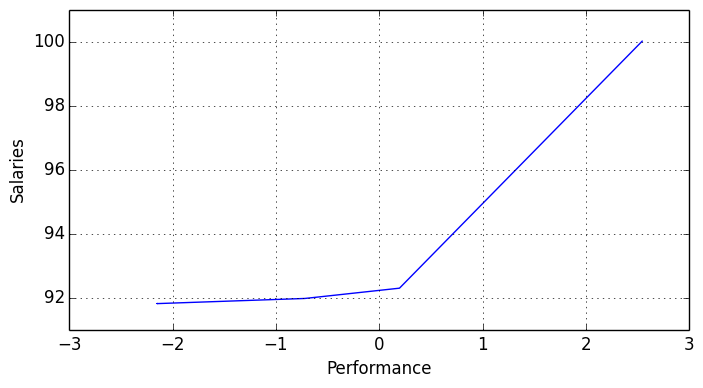

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


PyObject <matplotlib.text.Text object at 0x122a192d0>

In [300]:
using JuMP, Gurobi, PyPlot

salaries = []
performance = []
Npts = 10        # Number of points to be tested

lambdas = logspace(-1, 2, Npts)
for lambda in lambdas
    salary, stat = get_optimal(lambda)
    push!(salaries, salary)
    push!(performance, stat)
end

figure(figsize=(8,4))
plot(salaries, performance)
grid("on")
ylabel("Salaries")
xlabel("Performance")

#### Discussion of Results

The model optimizes a roster given current season data and salary information. As expected, the model suggests there is a positive relationship between the salaries that are paid to players and their on court performance. By increasing the payroll to a roster, there are visible increases in overall team performance. <br> <br>
In the graph, the performance vs salaries tradeoff curve is plotted. Ideally, the highest performance is desired at the lowest possible cost. The positive concavity of the graph the indicates that every point along the tradeoff curve is optimal, it is up to the user of the model to choose their tradeoff parameter to determine where along the curve they want to lie. For a team to have an average performance they need they need to spend at least roughly \$93 million dollars per year. To have a team that is 2 standard deviations above the average in the sum of team statistics, an organization must pay \$98 million dollars per year. 

#### Model Limitations

One limitation is the quality of the data. Since the intent of this project was not to assess the data quality, the results serve no purpose other than to validate that the model is indeed working. The data used is from the current season, which has a much smaller sample size of games because the season has has yet to reach the halfway point. 
<br><br>
There is nothing in the model that accounts for the recent trend of shooting 3 pointers, which has become a clear advantage that teams are trying to exploit. This is displayed by Stephen Curry, the best 3 point shooter of all time, being the highest paid player in the league as well. 
<br> <br>
This model also fails to endogenize shooting percentage and ability to get to the free throw line, two extremely important concepts that lead to wins when the game is in limbo.


## Conclusion 

This report offers a model to optimize a professional basketball team. This is done by analyzing the tradeoff between on court performance and salary for players in the National Basketball Association. Points, rebounds, assists and steals are the statistics that are used to determine level of performance.  <br> <br>
To make this model more easily interpretable, normalizing the statistics and salaries would be a valuable next step. 
In future iterations of this problem, I believe an important trade off that could be used to model team success is points per possession vs points allowed per possession. This standardizes scoring on a into discrete instances which allows for more accurate analysis. 

